In [1]:
## Load packages
from costs_benefits_ssp.cb_calculate import CostBenefits
import pandas as pd
from costs_benefits_ssp.model.cb_data_model import TXTable,CostFactor,TransformationCost,StrategyInteraction
import polars as pl
import os

In [2]:
##---- Define Directories ----##
SCRIPT_DIR_PATH = os.getcwd()
PARENT_DIR_PATH = os.path.dirname(SCRIPT_DIR_PATH)
OUTPUT_CB_PATH = os.path.join(SCRIPT_DIR_PATH, "output")
CONFIG_DIR_PATH = os.path.join(SCRIPT_DIR_PATH, "cb_config_files")
RUN_OUTPUT_DIR_PATH = os.path.join(PARENT_DIR_PATH, "ssp_run_output")
RUN_ID = "2025-09-26T19;43;09.815150"
RUN_DIR_PATH = os.path.join(RUN_OUTPUT_DIR_PATH, f"sisepuede_results_sisepuede_run_{RUN_ID}")


In [3]:
# Make sure output directory exists
os.makedirs(OUTPUT_CB_PATH, exist_ok=True)

In [4]:
## Load the data
ssp_data = pd.read_csv(os.path.join(RUN_DIR_PATH, 
                                    "decomposed_ssp_output.csv"))
att_primary = pd.read_csv(os.path.join(RUN_DIR_PATH, "ATTRIBUTE_PRIMARY.csv"))
att_strategy = pd.read_csv(os.path.join(RUN_DIR_PATH, "ATTRIBUTE_STRATEGY.csv"))
print(f"Loaded ssp_data with {ssp_data.shape[0]} rows and {ssp_data.shape[1]} columns")
print(f"Loaded att_primary with {att_primary.shape[0]} rows and {att_primary.shape[1]} columns")
print(f"Loaded att_strategy with {att_strategy.shape[0]} rows and {att_strategy.shape[1]} columns")

Loaded ssp_data with 98 rows and 4054 columns
Loaded att_primary with 2 rows and 4 columns
Loaded att_strategy with 74 rows and 6 columns


In [5]:
## Define base strategy
strategy_code_base = "BASE"

In [6]:
# Check if strategy_code_base exists in att_strategy
if strategy_code_base not in att_strategy['strategy_code'].values:
    raise ValueError(f"Base strategy code '{strategy_code_base}' not found in att_strategy.")

In [7]:
## Instantiate an object of the CostBenefits class
cb = CostBenefits(ssp_data, att_primary, att_strategy, strategy_code_base)

The TX TX:LNDU:BOUND_CLASSES is missing on AttTransformationCode
The TX TX:LNDU:DEC_CLASS_LOSS is missing on AttTransformationCode
The TX TX:LNDU:BOUND_CLASSES is missing on AttTransformationCode
The TX TX:LNDU:DEC_CLASS_LOSS is missing on AttTransformationCode
The TX TX:ENFU:ADJ_EXPORTS is missing on AttTransformationCode
The TX TX:ENFU:ADJ_EXPORTS is missing on AttTransformationCode
The TX TX:ENFU:ADJ_EXPORTS is missing on AttTransformationCode
The TX TX:LNDU:BOUND_CLASSES is missing on AttTransformationCode
The TX TX:LNDU:DEC_CLASS_LOSS is missing on AttTransformationCode


In [8]:
# Once the excel file has been updated, we can reload it to update the cost factors database
cb.load_cb_parameters(os.path.join(CONFIG_DIR_PATH, "cb_config_params.xlsx"))

Cargamos configuración de archivo excel
Se actualizó la base de datos


In [9]:
# Compute System Costs
results_system = cb.compute_system_cost_for_all_strategies(verbose=False)


************************************
*Strategy : PFLO:ALL (0/1)
************************************



In [10]:
# Compute Technical Costs
results_tx = cb.compute_technical_cost_for_all_strategies(verbose=False)


************************************
*Strategy : PFLO:ALL (0/1)
************************************

La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Co

/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:856: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["difference_variable"] = cb_orm.diff_var
/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:857: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["difference_value"] = data_merged["difference"]
/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:858: Setti

La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost
La variable se evalúa en Transformation Cost


In [11]:
# Combine results
results_all = pd.concat([results_system, results_tx], ignore_index = True)

In [12]:
#-------------POST PROCESS SIMULATION RESULTS---------------
# Post process interactions among strategies that affect the same variables
results_all_pp = cb.cb_process_interactions(results_all)

# SHIFT any stray costs incurred from 2015 to 2025 to 2025 and 2035
results_all_pp_shifted = cb.cb_shift_costs(results_all_pp)


Resolving Interactions in SCOE : TX:SCOE:INC_EFFICIENCY_APPLIANCE, TX:SCOE:SHIFT_FUEL_HEAT, TX:SCOE:SHIFT_FUEL_HEAT, TX:SCOE:DEC_DEMAND_HEAT 
Resolving Interactions in INEN : TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:SHIFT_FUEL_HEAT, TX:INEN:INC_EFFICIENCY_ENERGY 


/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_pre2025["variable"] = res_pre2025["variable"] + "_shifted" + (res_pre2025["time_period"]+SSP_GLOBAL_TIME_PERIOD_0).astype(str)#create a new variable so they can be recognized as shifted costs
/opt/miniconda3/envs/ssp_morocco_env/lib/python3.11/site-packages/costs_benefits_ssp/cb_calculate.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_pre2025[

In [13]:
results_all_pp_shifted

,strategy_code,future_id,region,time_period,difference_variable,variable_value_baseline,variable_value_pathway,difference_value,variable,value
0,PFLO:ALL,0,morocco,7,pop_unimproved_rural,299091.209054,299091.209054,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,0.000000e+00
1,PFLO:ALL,0,morocco,8,pop_unimproved_rural,294340.078493,294340.078493,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,0.000000e+00
2,PFLO:ALL,0,morocco,9,pop_unimproved_rural,289474.711388,289474.711388,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,0.000000e+00
3,PFLO:ALL,0,morocco,10,pop_unimproved_rural,284494.629299,284494.629299,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,-0.000000e+00
4,PFLO:ALL,0,morocco,11,pop_unimproved_rural,279403.968085,279403.968085,0.000000e+00,cb:wali:technical_cost:sanitation:unimp_rural,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
12042,PFLO:ALL,0,morocco,18,energy_consumption_inen_total,86.416971,86.416971,4.552968e-13,cb:inen:technical_savings:fuel_switch:all_shif...,-3.797176e-08
12043,PFLO:ALL,0,morocco,19,energy_consumption_inen_total,88.123216,88.123216,9.105937e-13,cb:inen:technical_savings:fuel_switch:all_shif...,-7.594351e-08
12044,PFLO:ALL,0,morocco,17,energy_consumption_inen_total,103.248044,103.248044,5.394630e-13,cb:inen:technical_cost:efficiency:X_shifted2022,5.394630e-06
12045,PFLO:ALL,0,morocco,18,energy_consumption_inen_total,102.392004,102.392004,5.394630e-13,cb:inen:technical_cost:efficiency:X_shifted2023,5.394630e-06


In [14]:
results_all_pp_shifted.describe()

,future_id,time_period,variable_value_baseline,variable_value_pathway,difference_value,value
count,12047.0,12047.000000,1.204700e+04,1.204700e+04,1.204700e+04,1.204700e+04
mean,0.0,30.027227,8.984149e+09,7.967515e+09,-1.016635e+09,1.064947e+11
std,0.0,14.020280,1.156115e+11,6.824177e+10,8.459000e+10,2.005455e+12
min,0.0,7.000000,-3.133448e-12,-7.117118e+02,-2.526990e+12,-1.736069e+11
25%,0.0,18.000000,0.000000e+00,0.000000e+00,-2.341787e+01,-4.056945e+03
50%,0.0,29.000000,7.702120e+01,8.904552e+01,0.000000e+00,0.000000e+00
75%,0.0,42.000000,2.913664e+05,1.181402e+06,3.589715e+01,5.931833e+06
max,0.0,55.000000,3.046555e+12,1.462333e+12,1.021217e+12,5.780525e+13


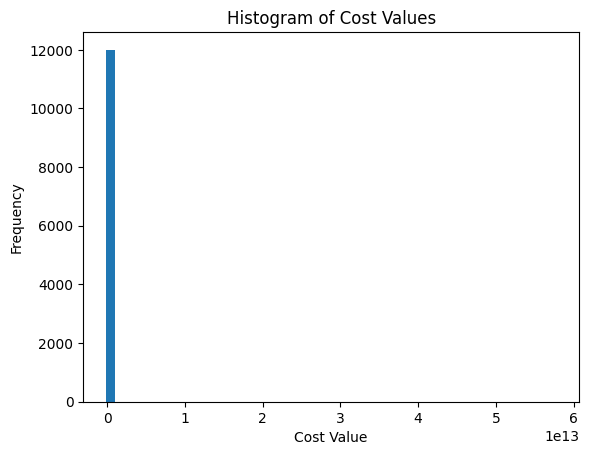

In [15]:
import matplotlib.pyplot as plt
plt.hist(results_all_pp_shifted.value, bins=50)
plt.title('Histogram of Cost Values')
plt.xlabel('Cost Value')
plt.ylabel('Frequency')
plt.show()

## Check for NaNs and Infs and DF Cleaning

In [16]:
# check nans
results_all_pp_shifted.value.isna().any()

np.False_

In [17]:
# check -inf or inf values
results_all_pp_shifted.value.isin([float('inf'), float('-inf')]).any()

np.False_

## Save

In [18]:
results_all_pp_shifted.to_csv(os.path.join(OUTPUT_CB_PATH, f"cb_{RUN_ID}.csv"), index = False)